<h1>Information Gain in Decision Trees</h1>

<p>The core algorithm for building decision trees called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. ID3 uses Entropy and Information Gain to construct a decision tree.</p>

<img src="https://cdn-images-1.medium.com/max/751/1*dU7xkQ9h-lX4pwDwJMFCng.png" />

<h2>Example</h2>
<img src="http://dataaspirant.com/wp-content/uploads/2017/01/B03905_05_01-compressor.png" />

<h2>Information Theory</h2>

<h3>Entropy</h3>

$$ H(X) = - \sum_{x} p(x) \log p(x) $$

<h4>Coin Toss ( Binary Classification )</h4>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Binary_entropy_plot.svg/300px-Binary_entropy_plot.svg.png" />

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("./bank/preprocessed.csv")
dataset = dataset.dropna(how='any')
Y = dataset.pop("y")
X = dataset

In [3]:
from sklearn.preprocessing import StandardScaler
cols = ["age", "job", "education", "day", "month", "campaign", "pdays", "previous", "poutcome"]
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])

In [4]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1,-0.783418,1.151417,1,0.358688,0,0.108750,1,1,1.0,-0.447751,-0.235285,0.071500,-0.653195,0.991315,0.337890,-0.722337
2,-0.579721,-1.110496,0,-1.196330,0,0.062590,1,0,1.0,0.193509,-0.562465,0.059914,-0.653195,0.911770,-0.686905,-0.722337
5,-0.579721,-1.110496,0,-1.196330,0,0.054496,0,0,1.0,1.091275,-1.216824,0.045349,-0.027181,-0.449325,-0.003708,-0.722337
6,-0.477872,1.528403,1,-1.196330,0,0.048590,1,0,1.0,-0.062995,-0.235285,0.111552,-0.653195,0.911770,-0.345306,0.639204
9,0.235067,1.151417,1,1.913707,0,0.043288,1,1,1.0,0.321762,-0.562465,0.102284,-0.653195,-0.705636,-0.345306,-0.722337


In [5]:
Y.head()

1    0
2    0
5    0
6    0
9    0
Name: y, dtype: int64

In [6]:
X.age.median()

-0.27417552647129473

In [7]:
n = 0
yes = 0
no = 0
for age, label in zip(np.array(X.age), np.array(Y)):
    if age > -0.27:
        if label == 0:
            no += 1
        else:
            yes += 1
        n += 1
n, yes, no

(359, 80, 279)

In [8]:
import math
- no/n * math.log(no/n) / math.log(2) - yes/n * math.log(yes/n) / math.log(2)

0.7653216672733791

<h3>Information Gain</h3>

<center>Information Gain = Entropy before splitting - Entropy after splitting</center>
$$ Gain(T, X) = Entropy(T) - Entropy(T, X) $$

In [9]:
n = yes = no = 0
n_s = yes_s = no_s = 0
for age, label in zip(np.array(X.age), np.array(Y)):
    if label == 0:
        no += 1
    else:
        yes += 1
    n += 1
    if age > -0.27:
        if label == 0:
            no_s += 1
        else:
            yes_s += 1
        n_s += 1
n, yes, no, n_s, yes_s, no_s

(737, 158, 579, 359, 80, 279)

In [10]:
e_t = - no/n * math.log(no/n) / math.log(2) - yes/n * math.log(yes/n) / math.log(2)
e_tx = - no_s/n_s * math.log(no_s/n_s) / math.log(2) - yes_s/n_s * math.log(yes_s/n_s) / math.log(2)
e_tx_inv = (1-no_s/n_s) * math.log((1-no_s/n_s)) / math.log(2) - (1-yes_s/n_s) * math.log((1-yes_s/n_s)) / math.log(2)
e_t - e_tx - e_tx_inv

0.1844424944294608

<h3>Gain Ratio</h3>

<p>In decision tree learning, Information gain ratio is a ratio of information gain to the intrinsic information. It is used to reduce a bias towards multi-valued attributes by taking the number and size of branches into account when choosing an attribute.</p>

<h2>Caution:</h2>
<p>Although information gain is usually a good measure for deciding the relevance of an attribute, it is not perfect. A notable problem occurs when information gain is applied to attributes that can take on a large number of distinct values. For example, suppose that one is building a decision tree for some data describing the customers of a business. Information gain is often used to decide which of the attributes are the most relevant, so they can be tested near the root of the tree. One of the input attributes might be the customer's credit card number. This attribute has a high mutual information, because it uniquely identifies each customer, but we do not want to include it in the decision tree: deciding how to treat a customer based on their credit card number is unlikely to generalize to customers we haven't seen before (overfitting).</p>

<h3>Advantages</h3>
<ul class="simple">
    <li>Simple to understand and to interpret. Trees can be visualised.</li>
    <li>Requires little data preparation. Other techniques often require data
    normalisation, dummy variables need to be created and blank values to
    be removed. Note however that this module does not support missing
    values.</li>
    <li>The cost of using the tree (i.e., predicting data) is logarithmic in the
    number of data points used to train the tree.</li>
    <li>Able to handle both numerical and categorical data. Other techniques
    are usually specialised in analysing datasets that have only one type
    of variable.</li>
    <li>Able to handle multi-output problems.</li>
    <li>Uses a white box model. If a given situation is observable in a model,
    the explanation for the condition is easily explained by boolean logic.
    By contrast, in a black box model (e.g., in an artificial neural
    network), results may be more difficult to interpret.</li>
    <li>Possible to validate a model using statistical tests. That makes it
    possible to account for the reliability of the model.</li>
    <li>Performs well even if its assumptions are somewhat violated by
    the true model from which the data were generated.</li>
</ul>
<h3>Disadvantages</h3>
<ul class="simple">
    <li>Decision-tree learners can create over-complex trees that do not
    generalise the data well. This is called overfitting. Mechanisms
    such as pruning (not currently supported), setting the minimum
    number of samples required at a leaf node or setting the maximum
    depth of the tree are necessary to avoid this problem.</li>
    <li>Decision trees can be unstable because small variations in the
    data might result in a completely different tree being generated.
    This problem is mitigated by using decision trees within an
    ensemble.</li>
    <li>The problem of learning an optimal decision tree is known to be
    NP-complete under several aspects of optimality and even for simple
    concepts. Consequently, practical decision-tree learning algorithms
    are based on heuristic algorithms such as the greedy algorithm where
    locally optimal decisions are made at each node. Such algorithms
    cannot guarantee to return the globally optimal decision tree.  This
    can be mitigated by training multiple trees in an ensemble learner,
    where the features and samples are randomly sampled with replacement.</li>
    <li>There are concepts that are hard to learn because decision trees
    do not express them easily, such as XOR, parity or multiplexer problems.</li>
    <li>Decision tree learners create biased trees if some classes dominate.
    It is therefore recommended to balance the dataset prior to fitting
    with the decision tree.</li>
</ul>

<h2>Decision Tree Loss Function</h2>

<h4>Zero/One Loss</h4>

$$ \ell(y, \bar{y}) =   \begin{cases} 
                            0 \qquad if \quad y = \bar{y} \\
                            1 \qquad otherwise
                        \end{cases} $$

<h2>Decision Tree with SKLearn</h2>

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=101)

In [13]:
from sklearn import tree

In [14]:
clf = tree.DecisionTreeClassifier()

In [15]:
clf = clf.fit(X_train, y_train)

In [16]:
round(clf.score(X_test, y_test) * 100, 2)

86.49

<h4>Visualize the Tree</h4>

In [17]:
import graphviz 

In [18]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns)

In [19]:
graph = graphviz.Source(dot_data) 

In [20]:
graph.render()

'Source.gv.pdf'

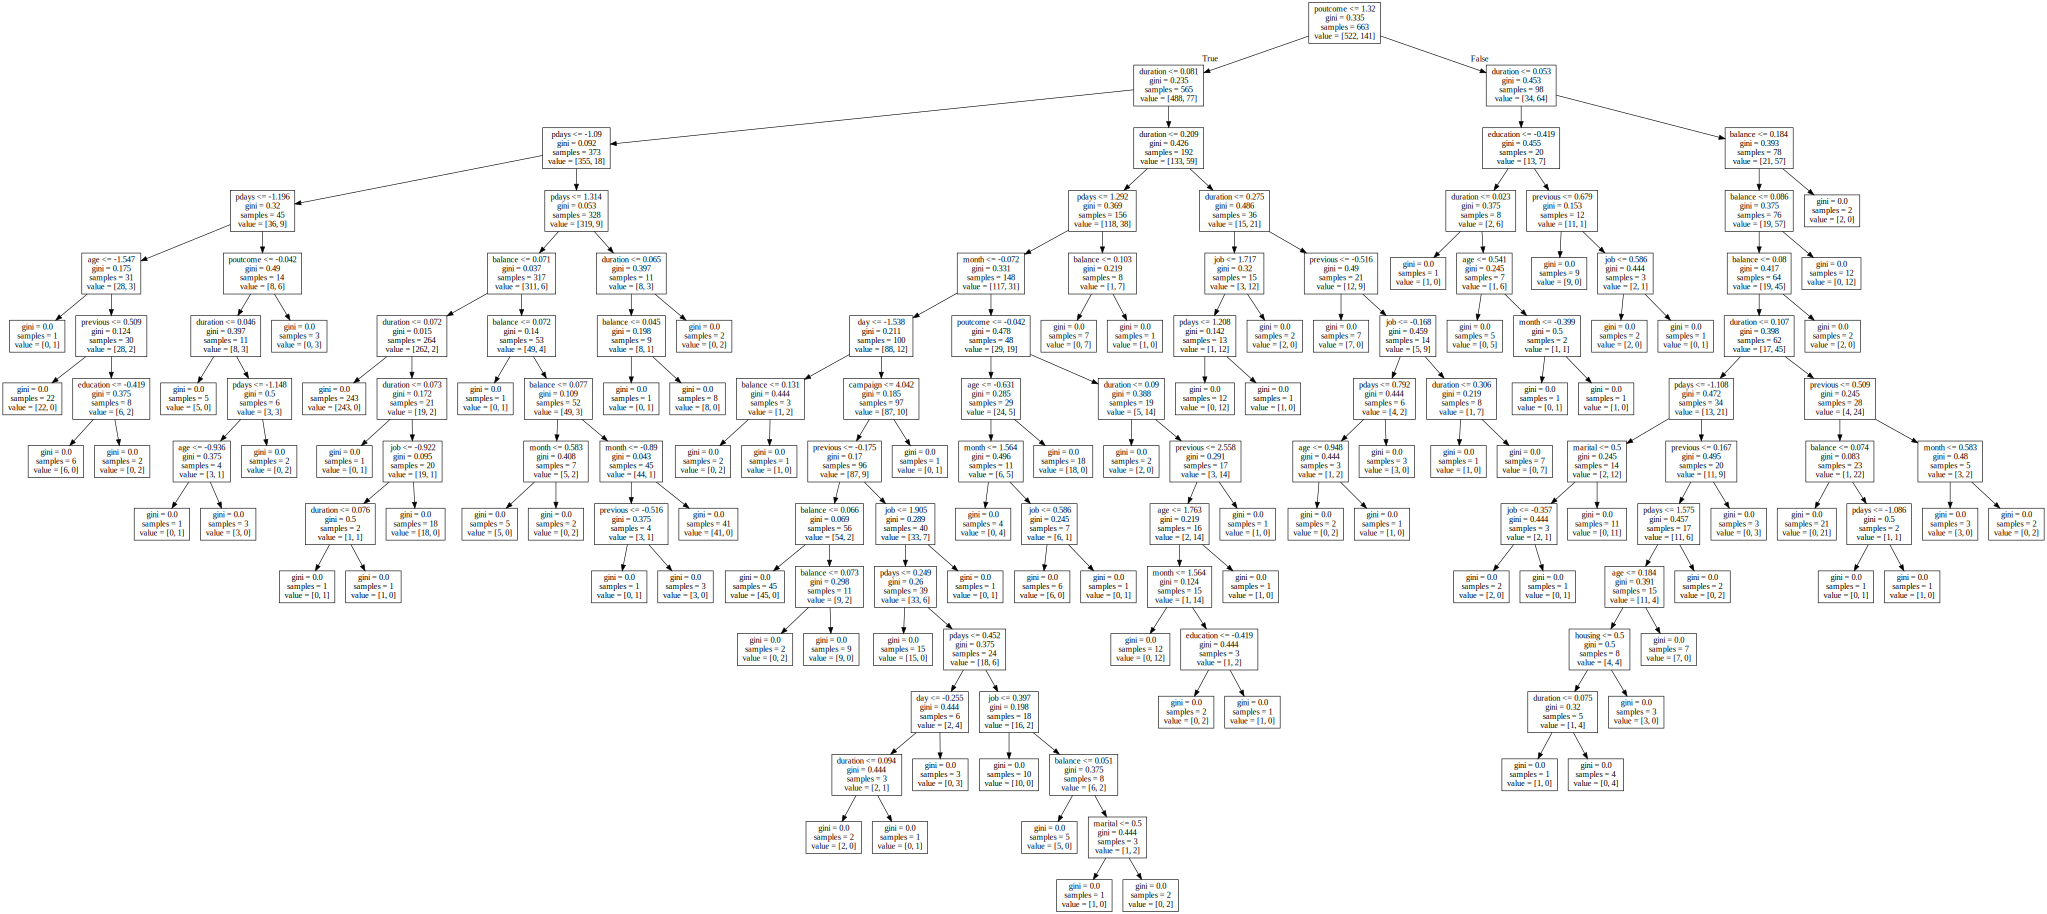

In [21]:
graph

<h2>Decision Tree & Logistic Regression</h2>

In [22]:
clf.feature_importances_

array([0.05204299, 0.05494109, 0.01544213, 0.038734  , 0.        ,
       0.09144525, 0.01080949, 0.        , 0.        , 0.01433093,
       0.07170957, 0.21605265, 0.00732183, 0.1207636 , 0.06132765,
       0.24507883])

In [23]:
clf.tree_.__getstate__()['nodes'][:3]

array([(1, 118, 15,  1.3199743 , 0.33488258, 663, 663.),
       (2,  47, 11,  0.08060245, 0.23542016, 565, 565.),
       (3,  20, 13, -1.09010112, 0.0918572 , 373, 373.)],
      dtype=[('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')])

In [24]:
ls_top_feats = []
for node in clf.tree_.__getstate__()['nodes'][:40]:
    if node[2] != -2:
        if node[2] not in ls_top_feats:
            ls_top_feats.append(node[2])

In [25]:
ls_top_feats

[15, 11, 13, 0, 14, 3, 5, 1, 10]

In [26]:
X.columns[ls_top_feats]

Index(['poutcome', 'duration', 'pdays', 'age', 'previous', 'education',
       'balance', 'job', 'month'],
      dtype='object')

In [27]:
feat_cols = X.columns[ls_top_feats]
mini_X = X[feat_cols]

X_train, X_test, y_train, y_test = train_test_split(mini_X, Y, test_size=0.1, random_state=101)

In [28]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
print("{:.2%}".format(logistic_model.score(X_test, y_test)))

81.08%


<h2>Random Forests</h2>

<img src="http://mechanicalforex.com/wp-content/uploads/2016/08/Selection_999256.jpg" />

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
clf = RandomForestClassifier(max_depth=2, random_state=101)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=101)

In [32]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [34]:
clf.score(X_test, y_test) * 100

79.72972972972973

In [35]:
clf.feature_importances_

array([0.02974874, 0.        , 0.00870372, 0.01113392, 0.        ,
       0.04725776, 0.14274484, 0.01198042, 0.        , 0.        ,
       0.09112332, 0.17568818, 0.01091752, 0.15718397, 0.02433847,
       0.28917914])

In [38]:
d = {}
i = 0
for gini in clf.feature_importances_:
    d[X.columns[i]] = gini
    i += 1
d

{'age': 0.029748739735037354,
 'balance': 0.04725776372237742,
 'campaign': 0.010917517553804578,
 'contact': 0.0,
 'day': 0.0,
 'default': 0.0,
 'duration': 0.17568817573401843,
 'education': 0.011133919728449503,
 'housing': 0.14274483822995873,
 'job': 0.0,
 'loan': 0.011980424019251333,
 'marital': 0.008703715316729642,
 'month': 0.09112332316780677,
 'pdays': 0.15718397259182787,
 'poutcome': 0.2891791412560373,
 'previous': 0.024338468944701035}

In [39]:
s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]

In [40]:
s

[('poutcome', 0.2891791412560373),
 ('duration', 0.17568817573401843),
 ('pdays', 0.15718397259182787),
 ('housing', 0.14274483822995873),
 ('month', 0.09112332316780677),
 ('balance', 0.04725776372237742),
 ('age', 0.029748739735037354),
 ('previous', 0.024338468944701035),
 ('loan', 0.011980424019251333),
 ('education', 0.011133919728449503),
 ('campaign', 0.010917517553804578),
 ('marital', 0.008703715316729642),
 ('job', 0.0),
 ('default', 0.0),
 ('contact', 0.0),
 ('day', 0.0)]

In [61]:
feat_columns = []
for k, v in s[:4]:
    feat_columns.append(k)

In [62]:
mini_X = X[feat_columns]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(mini_X, Y, test_size=0.1, random_state=101)

In [64]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
print("{:.2%}".format(logistic_model.score(X_test, y_test)))

85.14%


<h3>Exercise</h3>

<p>Try PCA on the Top Features</p>